In [4]:
import pandas as pd
import numpy as np

## 数据分组及操作

### 一、分组 groupby

In [18]:
df = pd.read_csv('data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
# 每年的平均寿命
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [7]:
# 每个大洲的平均寿命
df.groupby('continent')['lifeExp'].mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [8]:
# 每个国家的平均寿命
df.groupby('country')['lifeExp'].mean()

country
Afghanistan                 37.478833
Albania                     68.432917
Algeria                     59.030167
Angola                      37.883500
Argentina                   69.060417
Australia                   74.662917
Austria                     73.103250
Bahrain                     65.605667
Bangladesh                  49.834083
Belgium                     73.641750
Benin                       48.779917
Bolivia                     52.504583
Bosnia and Herzegovina      67.707833
Botswana                    54.597500
Brazil                      62.239500
Bulgaria                    69.743750
Burkina Faso                44.694000
Burundi                     44.817333
Cambodia                    47.902750
Cameroon                    48.128500
Canada                      74.902750
Central African Republic    43.866917
Chad                        46.773583
Chile                       67.430917
China                       61.785140
Colombia                    63.897750
Como

In [9]:
# 每个大洲的每个国家的平均寿命
df.groupby(['continent', 'country'])['lifeExp'].mean()

continent  country                 
Africa     Algeria                     59.030167
           Angola                      37.883500
           Benin                       48.779917
           Botswana                    54.597500
           Burkina Faso                44.694000
           Burundi                     44.817333
           Cameroon                    48.128500
           Central African Republic    43.866917
           Chad                        46.773583
           Comoros                     52.381750
           Congo, Dem. Rep.            44.543750
           Congo, Rep.                 52.501917
           Cote d'Ivoire               48.436167
           Djibouti                    46.380750
           Egypt                       56.243000
           Equatorial Guinea           42.960000
           Eritrea                     45.999250
           Ethiopia                    44.475750
           Gabon                       51.220500
           Gambia                

#### 关于分组字段选择: 需要根据需求定义；一定要跟着聚合操作，脱离聚合操作的分组没有意义。

#### 分组参数 as_index 控制分组字段是否作为index

In [10]:
# 默认分组字段会被作为索引
df.groupby('year')[['lifeExp']].mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


In [11]:
df.groupby('year', as_index=False)[['lifeExp']].mean()

,year,lifeExp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386
5,1977,59.570157
6,1982,61.533197
7,1987,63.212613
8,1992,64.160338
9,1997,65.014676


### 二、聚合函数

#### 1.1 内置聚合函数
**内置聚合函数是groupby返回的对象DataFrameGroupBy,SeriesGroupBy的方法**

In [24]:
data = pd.DataFrame([
    ['aa', True, True],
    ['aa', True, False],
    ['bb', True, False]
], columns=['c_1', 'c_2', 'c_3'])

##### 1.1.1 all 【判断全true，返回bool】

In [25]:
data.groupby('c_1')['c_2'].all()

c_1
aa    True
bb    True
Name: c_2, dtype: bool

In [26]:
data.groupby('c_1')['c_3'].all()

c_1
aa    False
bb    False
Name: c_3, dtype: bool

##### 1.1.2 any 【判断有true，返回bool】

In [27]:
data.groupby('c_1')['c_2'].any()

c_1
aa    True
bb    True
Name: c_2, dtype: bool

In [28]:
data.groupby('c_1')['c_3'].any()

c_1
aa     True
bb    False
Name: c_3, dtype: bool

##### 1.1.2 count 【统计数量，返回每个分组的数量，选择没有空的字段进行统计】

In [32]:
data1 = pd.DataFrame([
    ['aa', True, True, 1, 1],
    ['aa', True, False, 2, 2],
    ['bb', True, False, 3, np.NAN],
    ['bb', True, False, 4, 4],
    ['bb', True, False, 5, 5]
], columns=['c_1', 'c_2', 'c_3', 'c_4', 'c_5'])

In [33]:
data1.groupby('c_1')['c_4'].count()

c_1
aa    2
bb    3
Name: c_4, dtype: int64

In [34]:
data1.groupby('c_1')['c_5'].count()

c_1
aa    2
bb    2
Name: c_5, dtype: int64

##### 1.1.3 value_counts 【根据值，进行再分组统计次数】

In [50]:
data5 = pd.DataFrame([
    ['aa', 1],
    ['aa', 1],
    ['aa', 2],
    ['aa', 2],
    ['aa', 2],
    ['aa', 3],
    ['bb', 1],
    ['bb', 2],
], columns=['c_1', 'c_2'])

In [51]:
data5.groupby('c_1')['c_2'].value_counts()

c_1  c_2
aa   2      3
     1      2
     3      1
bb   1      1
     2      1
Name: c_2, dtype: int64

##### 1.1.3 sum 【求和聚合字段，根据选择聚合字段的值进行求和】

In [35]:
data1.groupby('c_1')['c_4'].sum()

c_1
aa     3
bb    12
Name: c_4, dtype: int64

##### 1.1.3 max、min 【找出聚合字段最值，根据选择聚合字段的值寻找】

In [36]:
data1.groupby('c_1')['c_4'].max()

c_1
aa    2
bb    5
Name: c_4, dtype: int64

##### 1.1.5 unique 【去重聚合值，根据选择聚合字段的值去重】

In [37]:
data2 = pd.DataFrame([
    ['aa', 2, True],
    ['aa', 4, False],
    ['bb', 5, True],
    ['bb', 5, False],
    ['bb', 5, False]
], columns=['c_1', 'c_2', 'c_3'])

In [38]:
data2.groupby('c_1')['c_2'].unique()

c_1
aa    [2, 4]
bb       [5]
Name: c_2, dtype: object

##### 1.1.6 nunique 【去重聚合值计数，根据选择聚合字段的值去重计数】

In [39]:
data2.groupby('c_1')['c_2'].nunique()

c_1
aa    2
bb    1
Name: c_2, dtype: int64

##### 1.1.7 mean、median、std 【求值，根据选择聚合字段的值求平均值，中位数、方差】

In [42]:
data2.groupby('c_1')['c_2'].median()

c_1
aa    3
bb    5
Name: c_2, dtype: int64

##### 1.1.8 first、last、head、tail 【位置范围值】

In [43]:
data2.groupby('c_1')['c_2'].first()

c_1
aa    2
bb    5
Name: c_2, dtype: int64

##### 1.1.8 cumsum 【累和】

In [44]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [47]:
df.groupby('continent')['gdpPercap'].cumsum()

0       7.794453e+02
1       1.600298e+03
2       2.453399e+03
3       3.289596e+03
4       4.029577e+03
5       4.815691e+03
6       5.793702e+03
7       6.646098e+03
8       7.295439e+03
9       7.930781e+03
10      8.657515e+03
11      9.632095e+03
12      1.601056e+03
13      3.543340e+03
14      5.856229e+03
15      8.616426e+03
16      1.192985e+04
17      1.546285e+04
18      1.909373e+04
19      2.283267e+04
20      2.533010e+04
21      2.852316e+04
22      3.312737e+04
23      3.906440e+04
24      2.449008e+03
25      5.462984e+03
26      8.013801e+03
27      1.126079e+04
28      1.544346e+04
29      2.035387e+04
            ...     
1674    3.118767e+06
1675    3.120739e+06
1676    3.122618e+06
1677    3.124736e+06
1678    3.126971e+06
1679    3.129252e+06
1680    1.346122e+06
1681    1.347434e+06
1682    1.348886e+06
1683    1.350663e+06
1684    1.352437e+06
1685    1.354026e+06
1686    1.355434e+06
1687    1.356647e+06
1688    1.357858e+06
1689    1.358930e+06
1690    1.360

##### 1.1.9 plot 【绘图】

continent
Africa      AxesSubplot(0.125,0.125;0.775x0.755)
Americas    AxesSubplot(0.125,0.125;0.775x0.755)
Asia        AxesSubplot(0.125,0.125;0.775x0.755)
Europe      AxesSubplot(0.125,0.125;0.775x0.755)
Oceania     AxesSubplot(0.125,0.125;0.775x0.755)
Name: lifeExp, dtype: object

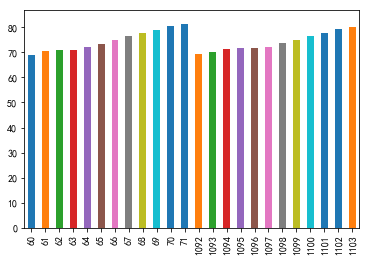

In [49]:
df.groupby('continent')['lifeExp'].plot(kind='bar')

#### 1.2 自定义聚合函数

##### 自定义聚合函数apply

In [19]:
def myfunc(x):
    return (x ** 2) - 1

df.groupby('continent')[['pop']].apply(myfunc)

,pop
0,70986236160888
1,85394861192355
2,105412993328888
3,133124659417155
4,171072273891599
5,221425470858383
6,165941183457855
7,192320231353848
8,266274545762240
9,494057977582224


##### 对于分组返回的结果类型不同（DataFrameGroupby, SeriesGroupby）所以apply在调用自定函数是，传入数据类型也不同，见： Pandas_apply自定义函数

##### 自定义聚合函数agg
**agg {'字段1': '聚合方法', '字段2': '聚合方法', ...} 可以对不同字段进行不同的聚合方法**

In [15]:
df1 = pd.DataFrame(np.random.randint(1, 10, (3, 5)), columns=['col_1', 'col_2', 'col_3', 'col_4', 'col_5'])
df1

,col_1,col_2,col_3,col_4,col_5
0,7,8,9,6,4
1,9,3,9,8,6
2,1,7,6,9,1


In [17]:
# 指定不同列进行不同的聚合函数
df1.agg({'col_1':'sum',
        'col_2':'mean',
        'col_3':'min',
        'col_4':'max',
        'col_5':'std'})

col_1    17.000000
col_2     6.000000
col_3     6.000000
col_4     9.000000
col_5     2.516611
dtype: float64

#### 1.3 聚合字段选择结论
- 聚合使用字段的选择，需要看聚合使用的函数。
    - 如果是mean、min、max这种和此列值有关系的函数，那么需要根据需求找指定的列。
    - 如果是count这种，统计分组结果的函数，选择字段的限制只有列内有没有nan。

### 三、转换函数 transform

In [7]:
# 案例1:
def my_zscore(x):
    return (x - x.mean()) / x.std()

In [8]:
df.shape

(1704, 6)

In [9]:
df.groupby('year')['lifeExp'].transform(my_zscore)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
5      -1.882224
6      -2.012809
7      -2.121069
8      -2.002813
9      -2.011488
10     -1.919077
11     -1.919936
12      0.504859
13      0.635469
14      0.926719
15      0.899551
16      0.882328
17      0.833673
18      0.825097
19      0.832432
20      0.660943
21      0.686480
22      0.810767
23      0.779886
24     -0.489174
25     -0.476025
26     -0.438633
27     -0.364480
28     -0.274943
29     -0.138606
          ...   
1674   -1.153155
1675   -0.974833
1676   -0.762541
1677   -0.605105
1678   -0.438681
1679   -0.356947
1680   -0.574157
1681   -0.607491
1682   -0.627106
1683   -0.675005
1684   -0.662486
1685   -0.728956
1686   -0.901731
1687   -1.173861
1688   -1.608598
1689   -2.143415
1690   -2.158168
1691   -2.039541
1692   -0.049617
1693   -0.084897
1694   -0.103433
1695   -0.143639
1696   -0.176805
1697   -0.168889
1698   -0.108647
1699   -0.081621
1700   -0.336974
1701   -1.5749

In [52]:
# 案例2:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
# tip取样10个
tips10 = tips.sample(10, random_state=22)
# 打乱index（permutition） 给tip列前4行赋值nan
tips10.loc[np.random.permutation(tips10.index)[:4], 'tip'] = np.NAN
# 按性别分组，对小费的缺失值，使用对应分组tip的均值填充nan
def fill_mean(x):
    return x.fillna(x.mean())
tips10.groupby('sex')['tip'].transform(fill_mean)

200    3.515
112    4.000
128    2.000
179    3.550
49     3.515
15     3.515
184    3.000
213    2.500
32     2.250
55     3.510
Name: tip, dtype: float64

#### 测试案例：

In [55]:
# 需求：存在数据bob和amy在近几个月的内的体重值，计算得出他们谁减重更多
weight_loss = pd.read_csv('./data/weight_loss.csv')

In [56]:
weight_loss.head()

,Name,Month,Week,Weight
0,Bob,Jan,Week 1,291
1,Amy,Jan,Week 1,197
2,Bob,Jan,Week 2,288
3,Amy,Jan,Week 2,189
4,Bob,Jan,Week 3,283


In [57]:
weight_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
Name      32 non-null object
Month     32 non-null object
Week      32 non-null object
Weight    32 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [58]:
weight_loss.describe()

,Weight
count,32.000000
mean,223.750000
std,48.777308
min,161.000000
25%,173.000000
50%,223.500000
75%,268.000000
max,291.000000


In [59]:
# 计算减重比例
# 传入的是使用name分组后的体重series
# 分别为week 1 ～ week 4
# x.iloc[0] 为第一周的体重，及原始体重
# x为当前周的体重，
# 每周累计的减重比例为 x.iloc[0] - x / x.iloc[0]
def func(x):
    return (x.iloc[0] - x) / x.iloc[0]

In [72]:
# 只查询一月分的数据, 验证自定义获取减重比例函数
data = weight_loss.query("Month == 'Jan'")
data.loc[:,'sub_Weight'] = data.groupby('Name')['Weight'].transform(func)
# 分别获取俩人这个月的体重
bob_data = data[data['Name'] == 'Bob']
bob_data = bob_data.reset_index().loc[:, ['Weight', 'sub_Weight']]
amy_data = data[data['Name'] == 'Amy']
amy_data = amy_data.reset_index().loc[:, ['Weight', 'sub_Weight']]
# 比较俩个人每月减重较多的人
bob_data - amy_data

/home/duchao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/duchao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Weight,sub_Weight
0,94,0.000000
1,99,-0.030300
2,94,-0.013118
3,93,-0.008042


In [73]:
weight_loss['sub'] = weight_loss.groupby(['Name', 'Month'])['Weight'].transform(func)

In [74]:
bob_data_index = weight_loss.query('Name == "Bob" and Week == "Week 4"')[['Month', 'sub']].set_index('Month')
amy_data_index = weight_loss.query('Name == "Amy" and Week == "Week 4"')[['Month', 'sub']].set_index('Month')

In [75]:
# 比较结果
bob_data_index - amy_data_index

,sub
Month,
Jan,-0.008042
Feb,-0.036470
Mar,0.008778
Apr,-0.010796


### 三、过滤函数 filter

**filter内需要是返回bool值的函数，可以是内置、自定义、匿名；过滤留下所有True的值**

In [77]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [78]:
# 过滤size count大于5的数据
tips.groupby('size').filter(lambda x:x['size'].count() > 5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
